In [1]:
import glob

root = glob.glob('./result/*')
print(len(root))

12


In [2]:
import numpy as np
import scipy as sp
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
       a = 1.0*np.array(data)
       n = len(a)
       m, se = np.mean(a), scipy.stats.sem(a)
       h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
       return m, m-h, m+h

In [3]:
import cv2
import numpy as np

size = 144
x = []
y = []
err = []

for fold in root:
    gt_list = sorted(glob.glob(fold+'/GT*.jpg'))
    seg_list = sorted(glob.glob(fold+'/SEG*.jpg'))

    DSC_list = []

    for i in range(len(gt_list)):
        
        GT = cv2.imread(gt_list[i], 0) / 255

        GT[GT > 0.5] = 1
        GT[GT <= 0.5] = 0

        AUTO = cv2.imread(seg_list[i], 0) / 255

        AUTO[AUTO > 0.5] = 1
        AUTO[AUTO <= 0.5] = 0

        A_Intersect_G = np.multiply(AUTO, GT)
                
        DSC = (2 * np.sum(A_Intersect_G)) / (np.sum(AUTO) + np.sum(GT))

        if DSC >= 0:
            DSC_list.append(DSC)

    m, nh, ph = mean_confidence_interval(DSC_list, confidence=0.95)

    x.append(size)
    y.append(m)
    err.append(m-nh)

    size = size + 16


    print(m, nh, ph)

0.679998788384814 0.6733941653547879 0.68660341141484
0.6628185579725481 0.6558997730693584 0.6697373428757377
0.6395527369589818 0.632142669404582 0.6469628045133817
0.6292323190142088 0.6217182929660199 0.6367463450623978
0.6128152042297493 0.6050336888514196 0.620596719608079
0.6011619117847073 0.5933468392512861 0.6089769843181286
0.5910386296584581 0.583101982716481 0.5989752766004353
0.5738713986326909 0.5657442852847 0.5819985119806818
0.5534121891978342 0.5451787161983125 0.5616456621973559
0.5534463469189586 0.5450523165536679 0.5618403772842492
0.5077100005566046 0.49896126610943703 0.5164587350037723
0.5355201000594391 0.5270004247497347 0.5440397753691434


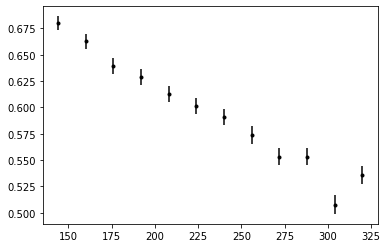

In [6]:
import matplotlib.pyplot as plt
plt.errorbar(x, y, yerr=err, fmt='.k')
plt.show()

In [5]:
print(err)

[0.006604623030026069, 0.006918784903189645, 0.0074100675543998795, 0.00751402604818896, 0.0077815153783297175, 0.007815072533421286, 0.007936646941977155, 0.008127113347990877, 0.008233472999521707, 0.008394030365290628, 0.008748734447167617, 0.008519675309704322]
